In [1]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from skforecast.model_selection_multiseries import grid_search_forecaster_multiseries

In [2]:
# Data preparation
# ==============================================================================
import pandas as pd 
data = pd.read_csv('18-23数据.csv',encoding='utf-8')
data = data[data['日期']<20230101]
data_yichang = pd.read_csv('异常件.csv',encoding='utf-8')
data_yichang = data_yichang[data_yichang['日期']<20230101]

data_add_23 = pd.read_csv('异常件2301-2308数据.csv',encoding='utf-8')
data_yichang_add_23 = pd.read_csv('2301-2308数据.csv',encoding='utf-8')

In [3]:
data = pd.concat([data, data_yichang, data_add_23, data_yichang_add_23], ignore_index=True)

In [4]:
data['日期'] = pd.to_datetime(data['日期'], format='%Y%m%d').dt.strftime('%Y-%m-%d')
new_df = data.groupby(['零件号','日期'])['需求数量'].sum().reset_index()
new_df['日期'] = pd.to_datetime(new_df['日期'])

# 生成日期范围
date_range = pd.date_range(start='2016-12-12', end='2023-08-31', freq='D')
# 创建空的DataFrame，准备存储填充后的结果
filled_df = pd.DataFrame()

# 针对每个 SKU 进行填充操作
for sku, group in new_df.groupby('零件号'):
    sku_group = group.set_index('日期').reindex(date_range, fill_value=0).reset_index()
    sku_group['零件号'] = sku
    filled_df = filled_df.append(sku_group, ignore_index=True)

df=filled_df.set_index(['index','零件号'])['需求数量'].unstack()
df.columns.name=None
df=df.reset_index()

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_df = filled_df.append(sku_group, ignore_index=True)
/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/3429550438.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

In [5]:
# data= df.iloc[:,:1000].copy()
data = df.copy()
data = data.rename(columns = {'index':'date'})
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.set_index('date')
data = data.asfreq('D')
data = data.sort_index()
data.head()

,000098602A,000098670A,000800981B,000800981C,000979035E,000979136E,000979150EC,000979159EC,021972913E,026109150A,...,WHT005560,WHT006112,WHT006552,WHT006721,WHT007210,WHT007803,WHT008715,WHT008801,WHT008949,WHT009442
date,,,,,,,,,,,,,,,,,,,,,
2016-12-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-12-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-12-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-12-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-12-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df = data[['000098602A']].reset_index('date')
df.columns = ['日期','需求值']

Epoch 1/100
55/55 [==============================] - 4s 22ms/step - loss: 0.0000e+00 - val_loss: 0.0052
Epoch 2/100
55/55 [==============================] - 1s 18ms/step - loss: 0.0000e+00 - val_loss: 0.0052
Epoch 3/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0000e+00 - val_loss: 0.0052
Epoch 4/100
55/55 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - val_loss: 0.0052
Epoch 5/100
55/55 [==============================] - 2s 31ms/step - loss: 0.0000e+00 - val_loss: 0.0052
Epoch 6/100
55/55 [==============================] - 1s 18ms/step - loss: 0.0000e+00 - val_loss: 0.0052
Epoch 7/100
55/55 [==============================] - 1s 13ms/step - loss: 0.0000e+00 - val_loss: 0.0052
Epoch 8/100
55/55 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - val_loss: 0.0052
Epoch 9/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0000e+00 - val_loss: 0.0052
Epoch 10/100
55/55 [==============================] - 1s 15ms/st

55/55 [==============================] - 2s 32ms/step - loss: 0.0000e+00 - val_loss: 0.0052
Epoch 80/100
55/55 [==============================] - 1s 26ms/step - loss: 0.0000e+00 - val_loss: 0.0052
Epoch 81/100
55/55 [==============================] - 1s 17ms/step - loss: 0.0000e+00 - val_loss: 0.0052
Epoch 82/100
55/55 [==============================] - 1s 12ms/step - loss: 0.0000e+00 - val_loss: 0.0052
Epoch 83/100
55/55 [==============================] - 1s 13ms/step - loss: 0.0000e+00 - val_loss: 0.0052
Epoch 84/100
55/55 [==============================] - 1s 15ms/step - loss: 0.0000e+00 - val_loss: 0.0052
Epoch 85/100
55/55 [==============================] - 1s 22ms/step - loss: 0.0000e+00 - val_loss: 0.0052
Epoch 86/100
55/55 [==============================] - 2s 34ms/step - loss: 0.0000e+00 - val_loss: 0.0052
Epoch 87/100
55/55 [==============================] - 1s 25ms/step - loss: 0.0000e+00 - val_loss: 0.0052
Epoch 88/100
55/55 [==============================] - 1s 24ms/step -

/var/folders/tq/ty6dg6810571sz60cwyxn8ch0000gn/T/ipykernel_58408/4038755227.py:66: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=df['日期'].iloc[-1], periods=31, closed='right')
/Users/kaka/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kaka/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kaka/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kaka/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27714 (\N{CJK UNI

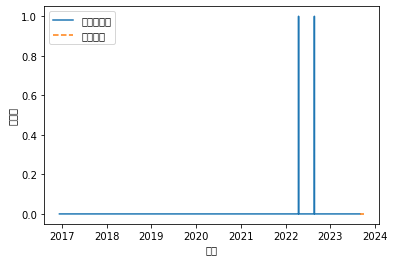

In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 数据准备
# 假设您的数据已经加载到名为 "df" 的DataFrame中，包括"日期"和"需求值"列。
# 确保日期列已解析为日期时间类型。
# 以下是一个示例：

# df = pd.read_csv('your_data.csv')
# df['日期'] = pd.to_datetime(df['日期'])

# 2. 数据预处理
scaler = MinMaxScaler()
df['需求值'] = scaler.fit_transform(df[['需求值']])

# 3. 创建滑动窗口样本
n_steps = 30  # 滑动窗口大小，用于生成训练样本

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

X, y = create_sequences(df['需求值'].values, n_steps)

# 4. 建立GRU模型
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))  # 输出层只有一个神经元，用于预测单个需求值
model.compile(optimizer='adam', loss='mse')

# 5. 分割训练集和测试集
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# 6. 训练模型
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# 7. 模型评估
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# 8. 未来30天的预测
last_sequence = X[-1].reshape(1, n_steps, 1)
future_predictions = []

for _ in range(30):
    prediction = model.predict(last_sequence)[0, 0]
    future_predictions.append(prediction)
    last_sequence = np.roll(last_sequence, -1, axis=1)  # 移动滑动窗口
    last_sequence[0, -1, 0] = prediction  # 设置新的值

# 反归一化未来预测
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# 9. 可视化结果
# 9. 可视化结果
plt.plot(df['日期'], df['需求值'], label='历史需求值')
future_dates = pd.date_range(start=df['日期'].iloc[-1], periods=31, closed='right')
plt.plot(future_dates, future_predictions, label='未来预测', linestyle='--')
plt.legend()
plt.xlabel('日期')
plt.ylabel('需求值')
plt.show()


In [31]:
model.predict(last_sequence)[0, 0]

1/1 [==============================] - 0s 35ms/step


array([0.], dtype=float32)

In [32]:
np.roll(last_sequence, -1, axis=1)  # 移动滑动窗口

array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]])